## Business Problem: 
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to
provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect
to customer characteristics.


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)

import warnings
warnings.filterwarnings("ignore")

## Data Project from Aerofit

In [3]:
# Importing data
df = pd.read_csv('aerofit_treadmill.csv')

In [4]:
# Reading dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
# Shape of the dataframe
df.shape

(180, 9)

* Product: Product Purchased KP281, KP481, or KP781 
* Age:  In years
* Gender: Male/Female
* Education: in years
* MaritalStatus: single or partnered
* Usage: average number of times the customer plans to use the treadmill each week
* Income: annual income (in $)
* Fitness: self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape. 
* Miles: average number of miles the customer expects to walk/run each week

In [6]:
# Name of each column in dataframe
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Datatype of each column in dataframe
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [10]:
df.select_dtypes(include=['number']).skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [11]:
df.select_dtypes(include=['number']).describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [12]:
df.select_dtypes(exclude=['number']).describe()


,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [19]:
# Missing value detection
df.isna().sum() # No missing values detected in DataFrame

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [20]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [13]:
# Checking duplicate values in the dataset
df.duplicated(subset=None,keep='first').sum() # No duplicate values in the dataset

np.int64(0)

## Non-Graphical Analysis

## Value Counts

In [14]:
df["Product"].value_counts()


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [15]:
df["Gender"].value_counts()


Gender
Male      104
Female     76
Name: count, dtype: int64

In [16]:
df["MaritalStatus"].value_counts()


MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

## Unique Attributes

In [17]:
df.nunique()


Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [18]:
df["Product"].unique()


['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [19]:
df["Age"].unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [20]:
df["Gender"].unique()


['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [21]:
df["Education"].unique()


array([14, 15, 12, 13, 16, 18, 20, 21])

In [22]:
df["MaritalStatus"].unique()


['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [23]:
df["Usage"].unique()


array([3, 2, 4, 5, 6, 7])

In [24]:
df["Income"].unique()


array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [25]:
df["Fitness"].unique()


array([4, 3, 2, 1, 5])

In [26]:
df["Miles"].unique()


array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

## Graphical Analysis

## Univariate Analysis - Numerical Variables


In [35]:
# Distance Plot

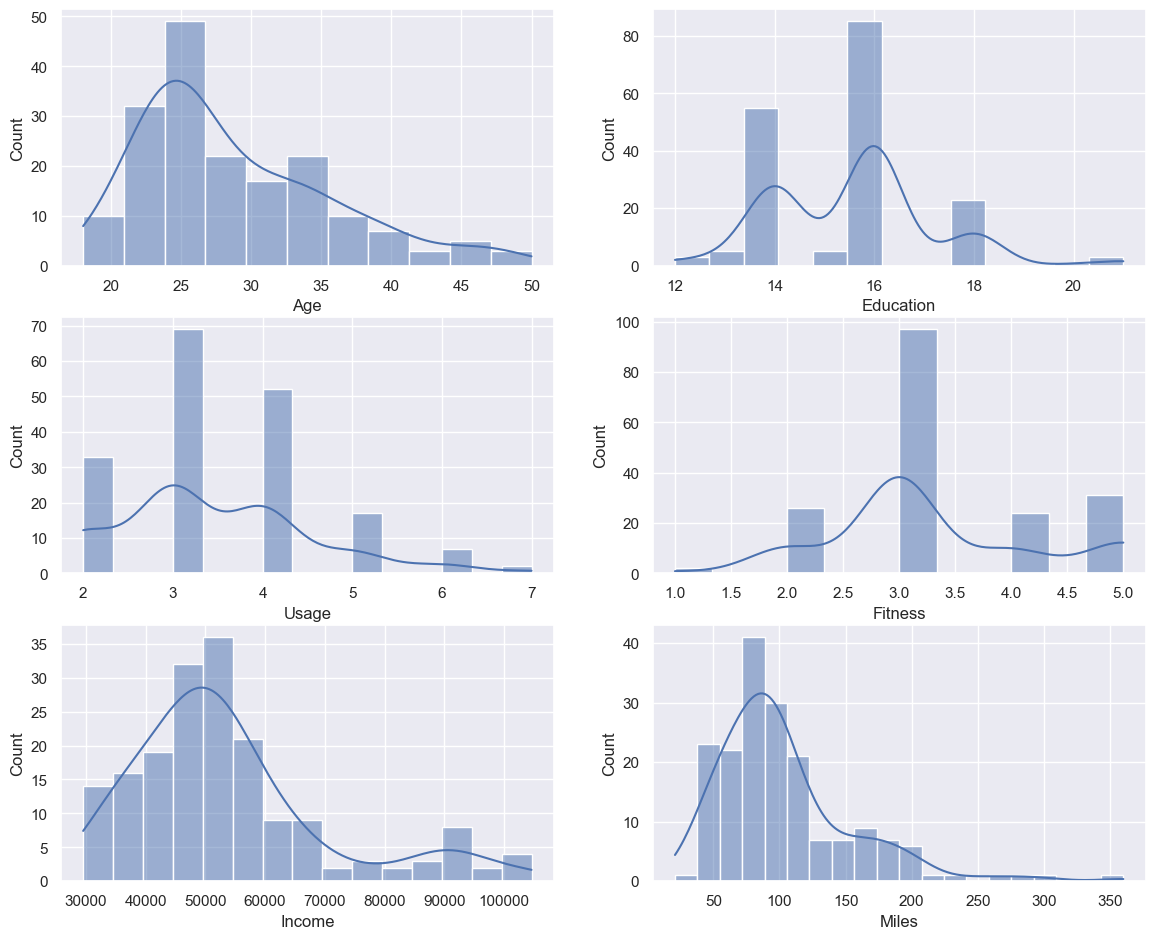

In [27]:
hist_fig, hist_axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
hist_fig.subplots_adjust(top=1.2)

sns.histplot(df['Age'], kde=True, ax=hist_axes[0,0])
sns.histplot(df['Education'], kde=True, ax=hist_axes[0,1])
sns.histplot(df['Usage'], kde=True, ax=hist_axes[1,0])
sns.histplot(df['Fitness'], kde=True, ax=hist_axes[1,1])
sns.histplot(df['Income'], kde=True, ax=hist_axes[2,0])
sns.histplot(df['Miles'], kde=True, ax=hist_axes[2,1])
plt.show()

In [28]:
# count plot

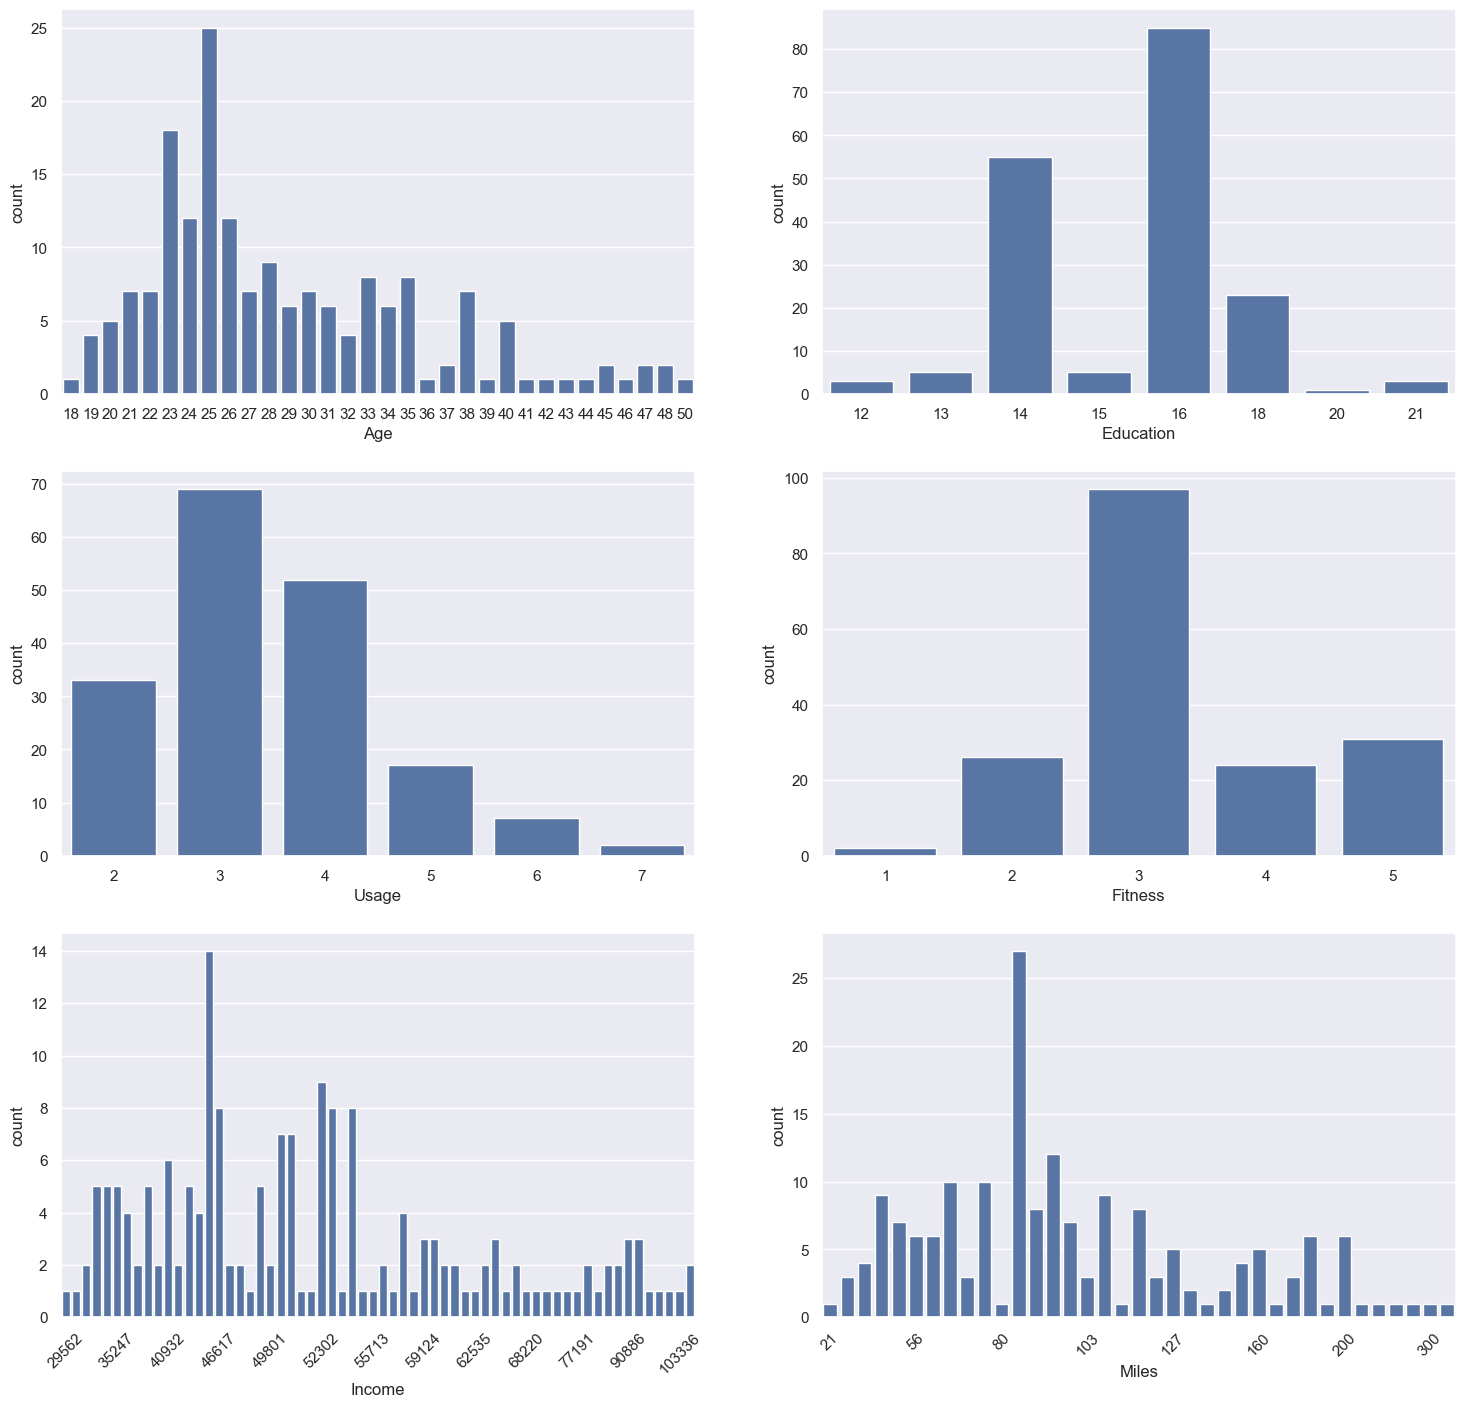

In [29]:
count_fig, count_axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
count_fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=count_axes[0,0])
sns.countplot(data=df, x="Education", ax=count_axes[0,1])
sns.countplot(data=df, x="Usage", ax=count_axes[1,0])
sns.countplot(data=df, x="Fitness", ax=count_axes[1,1])
sns.countplot(data=df, x="Income", ax=count_axes[2,0])
sns.countplot(data=df, x="Miles", ax=count_axes[2,1])

# Show only every 5th label for Income and Miles
for ax in [count_axes[2,0], count_axes[2,1]]:
    labels = ax.get_xticklabels()
    for i, label in enumerate(labels):
        if i % 5 != 0:  
            label.set_visible(False)
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [30]:
# Box plot

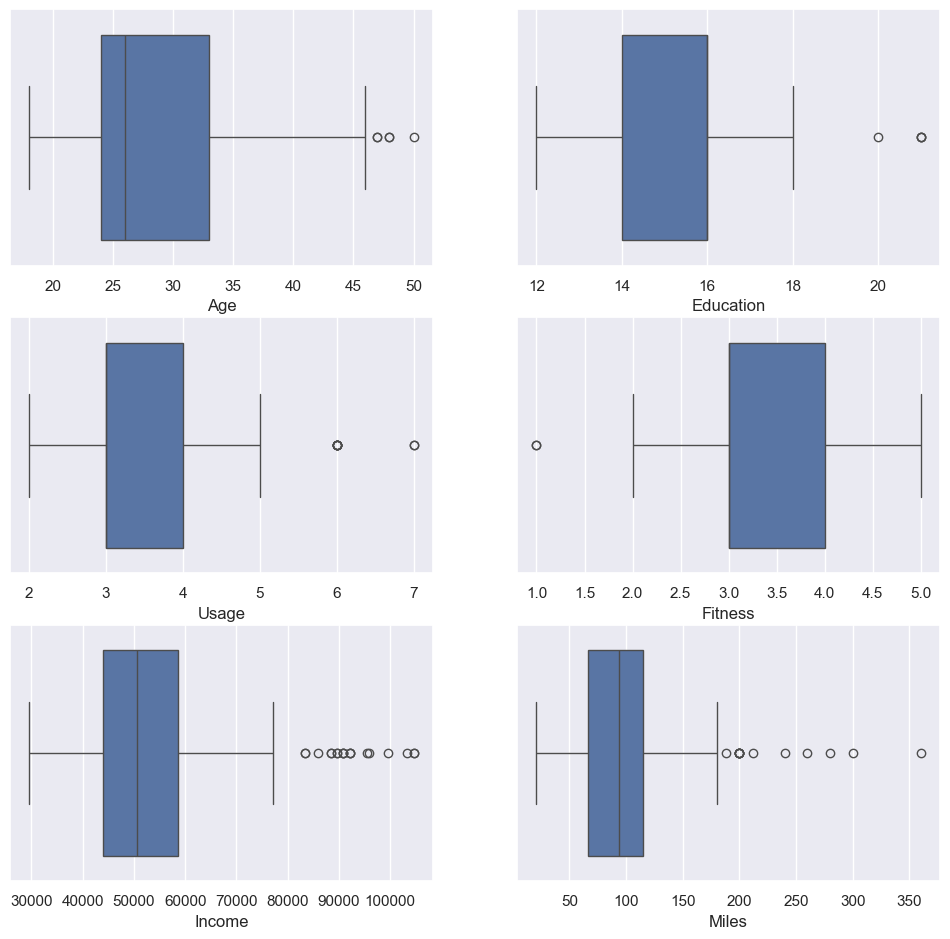

In [31]:
box_fig, box_axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
box_fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=box_axes[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=box_axes[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=box_axes[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=box_axes[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=box_axes[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=box_axes[2,1])
plt.show()

In [32]:
# Univariate Analysis - Categorical Variables


In [33]:
# count plot

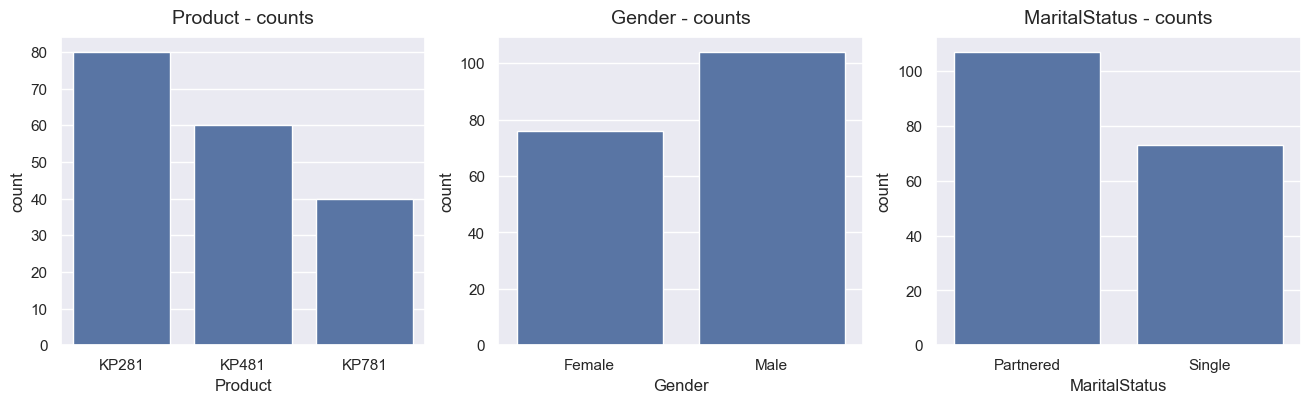

In [34]:
categorical_fig, categorical_axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.countplot(data=df, x='Product', ax=categorical_axes[0])
sns.countplot(data=df, x='Gender', ax=categorical_axes[1])
sns.countplot(data=df, x='MaritalStatus', ax=categorical_axes[2])

categorical_axes[0].set_title("Product - counts", pad=10, fontsize=14)
categorical_axes[1].set_title("Gender - counts", pad=10, fontsize=14)
categorical_axes[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [35]:
## Bivariate Analysis

In [36]:
# Checking if features have any effect on the product purchased.

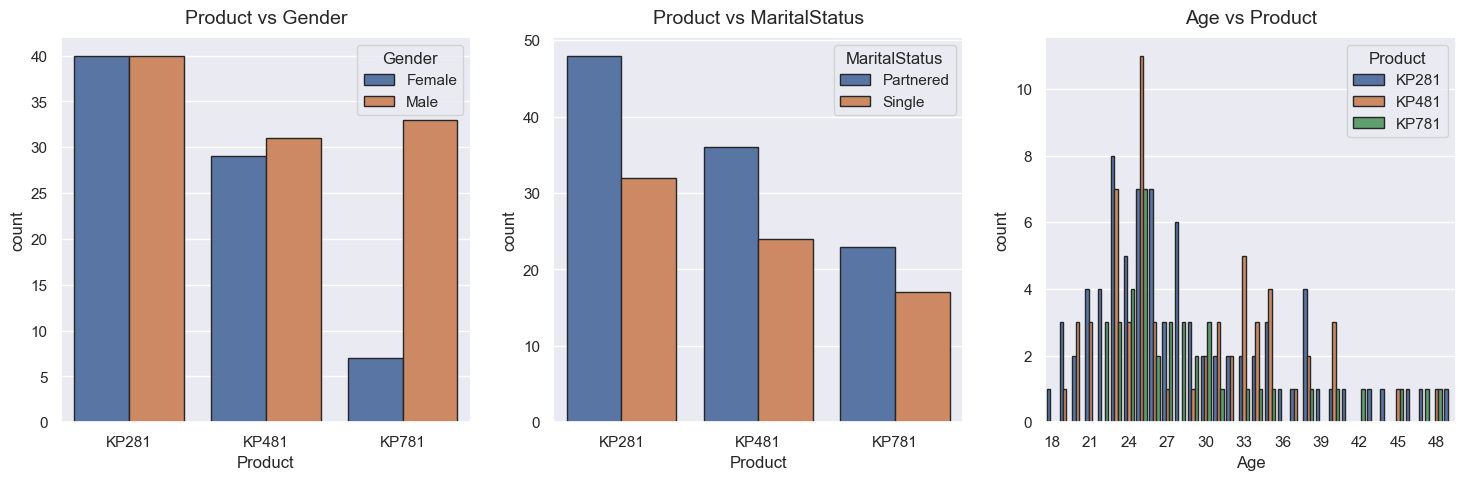

In [37]:
product_comparison_fig, product_comparison_axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=product_comparison_axes[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=product_comparison_axes[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=product_comparison_axes[2])

product_comparison_axes[0].set_title("Product vs Gender", pad=10, fontsize=14)
product_comparison_axes[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
product_comparison_axes[2].set_title("Age vs Product", pad=10, fontsize=14)

# Show only every 3rd label for Age
age_tick_labels = product_comparison_axes[2].get_xticklabels()
for label_idx, tick_label in enumerate(age_tick_labels):
    if label_idx % 3 != 0:
        tick_label.set_visible(False)

plt.show()

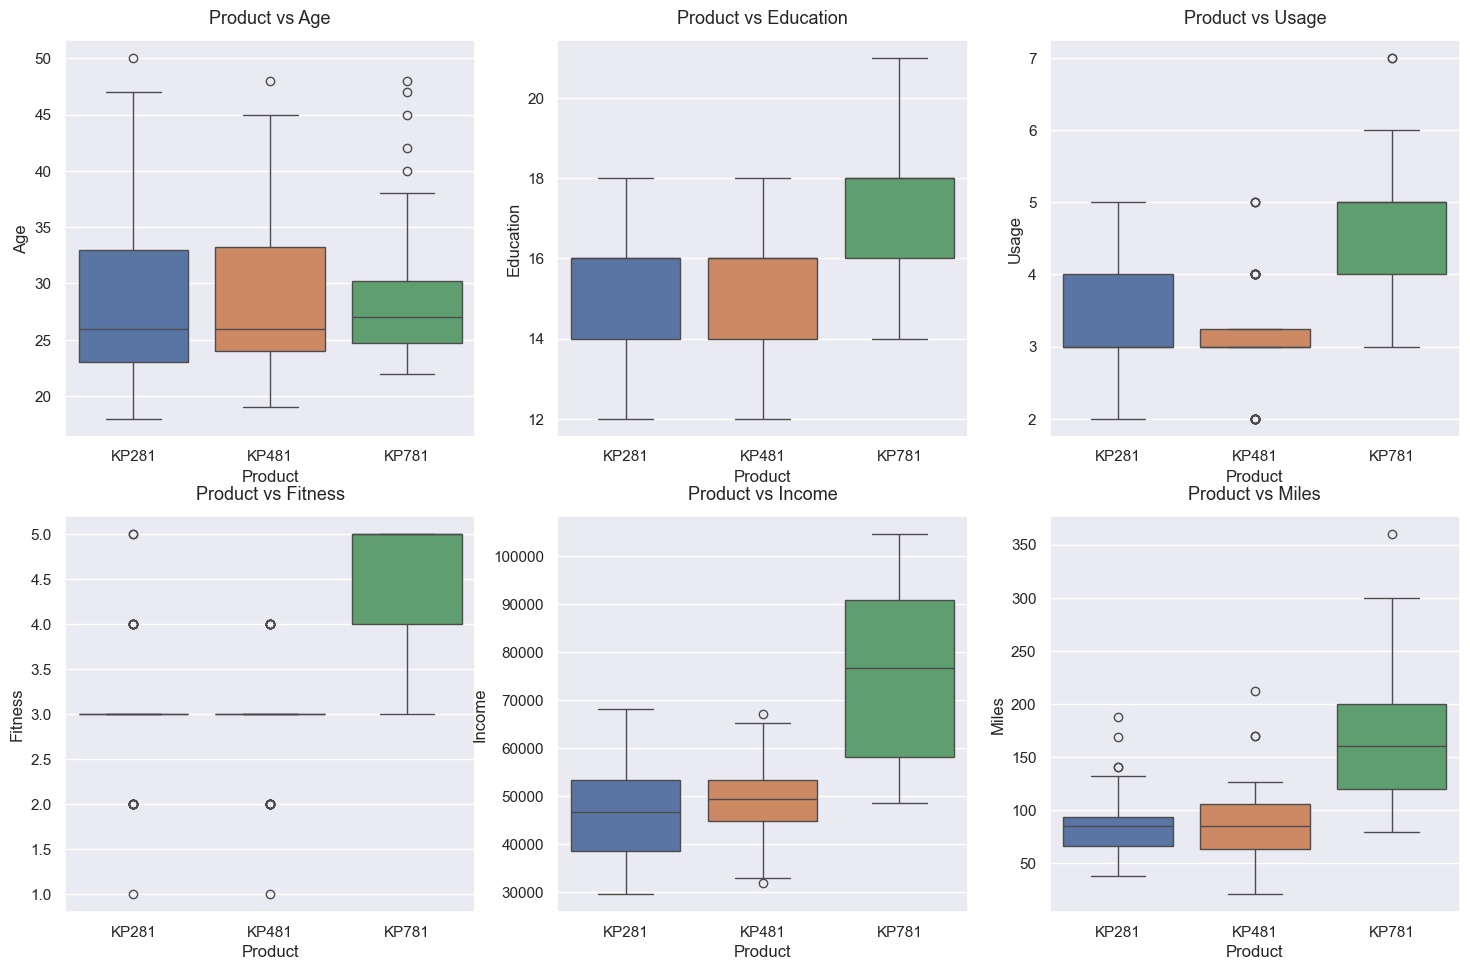

In [38]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
product_attributes_fig, product_attributes_axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
product_attributes_fig.subplots_adjust(top=1.2)

count = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], hue='Product', ax=product_attributes_axes[row, col])
        product_attributes_axes[row, col].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

plt.show()

In [39]:
## Multivariate Analysis

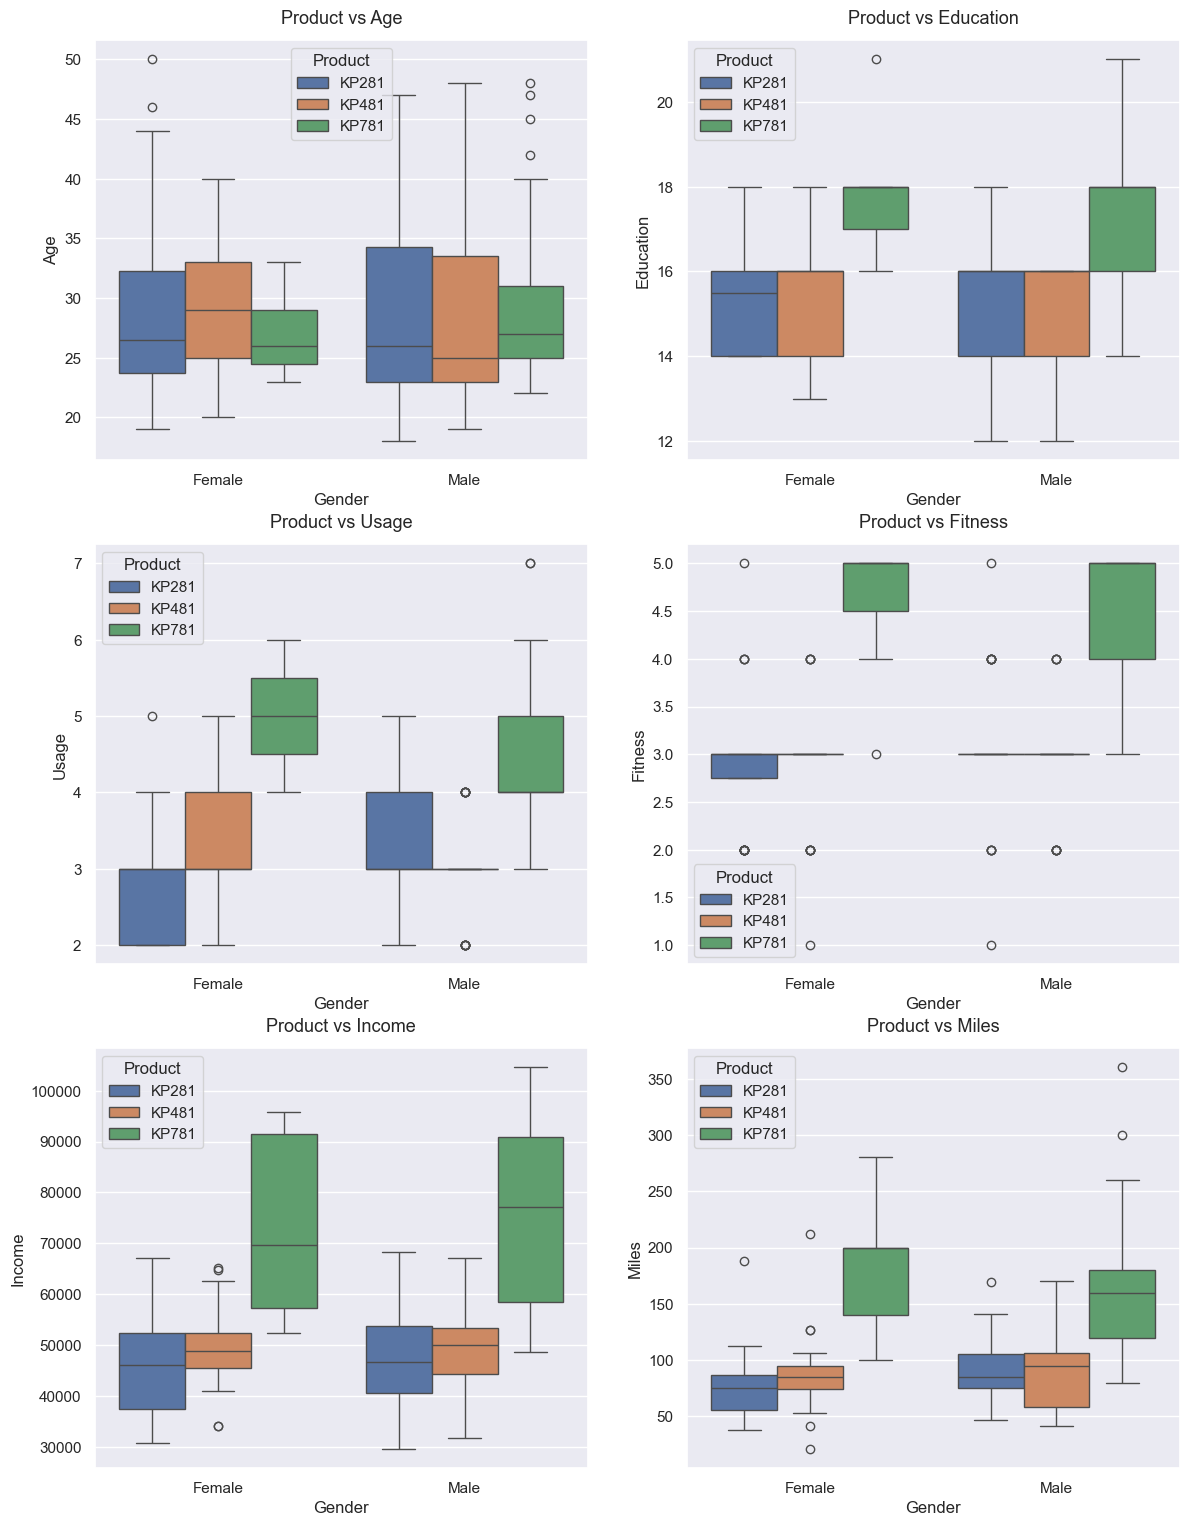

In [40]:
gender_attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
gender_by_product_fig, gender_by_product_axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
gender_by_product_fig.subplots_adjust(top=1.3)

attr_index = 0
for grid_row in range(3):
    for grid_col in range(2):
        sns.boxplot(data=df, x='Gender', y=gender_attrs[attr_index], hue='Product', ax=gender_by_product_axes[grid_row, grid_col])
        gender_by_product_axes[grid_row, grid_col].set_title(f"Product vs {gender_attrs[attr_index]}", pad=12, fontsize=13)
        attr_index += 1

plt.show()

In [41]:
## Correlation Analysis

In [42]:
df.select_dtypes(include=['number']).cov()


,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [43]:
df.select_dtypes(include=['number']).corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [44]:
# Heatmaps

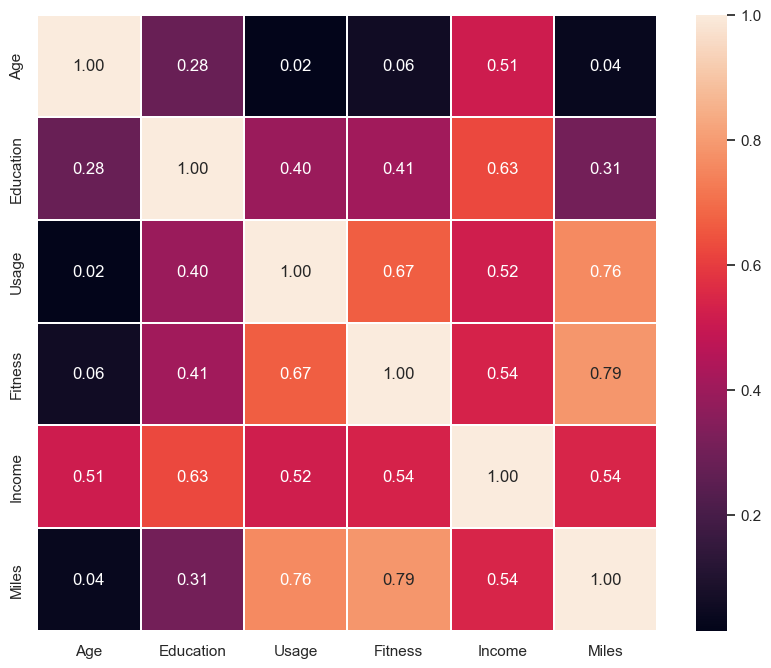

In [45]:
corr_fig, corr_ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), ax=corr_ax, annot=True, linewidths=0.05, fmt='0.2f')

plt.show()

In [46]:
## Pair Plots

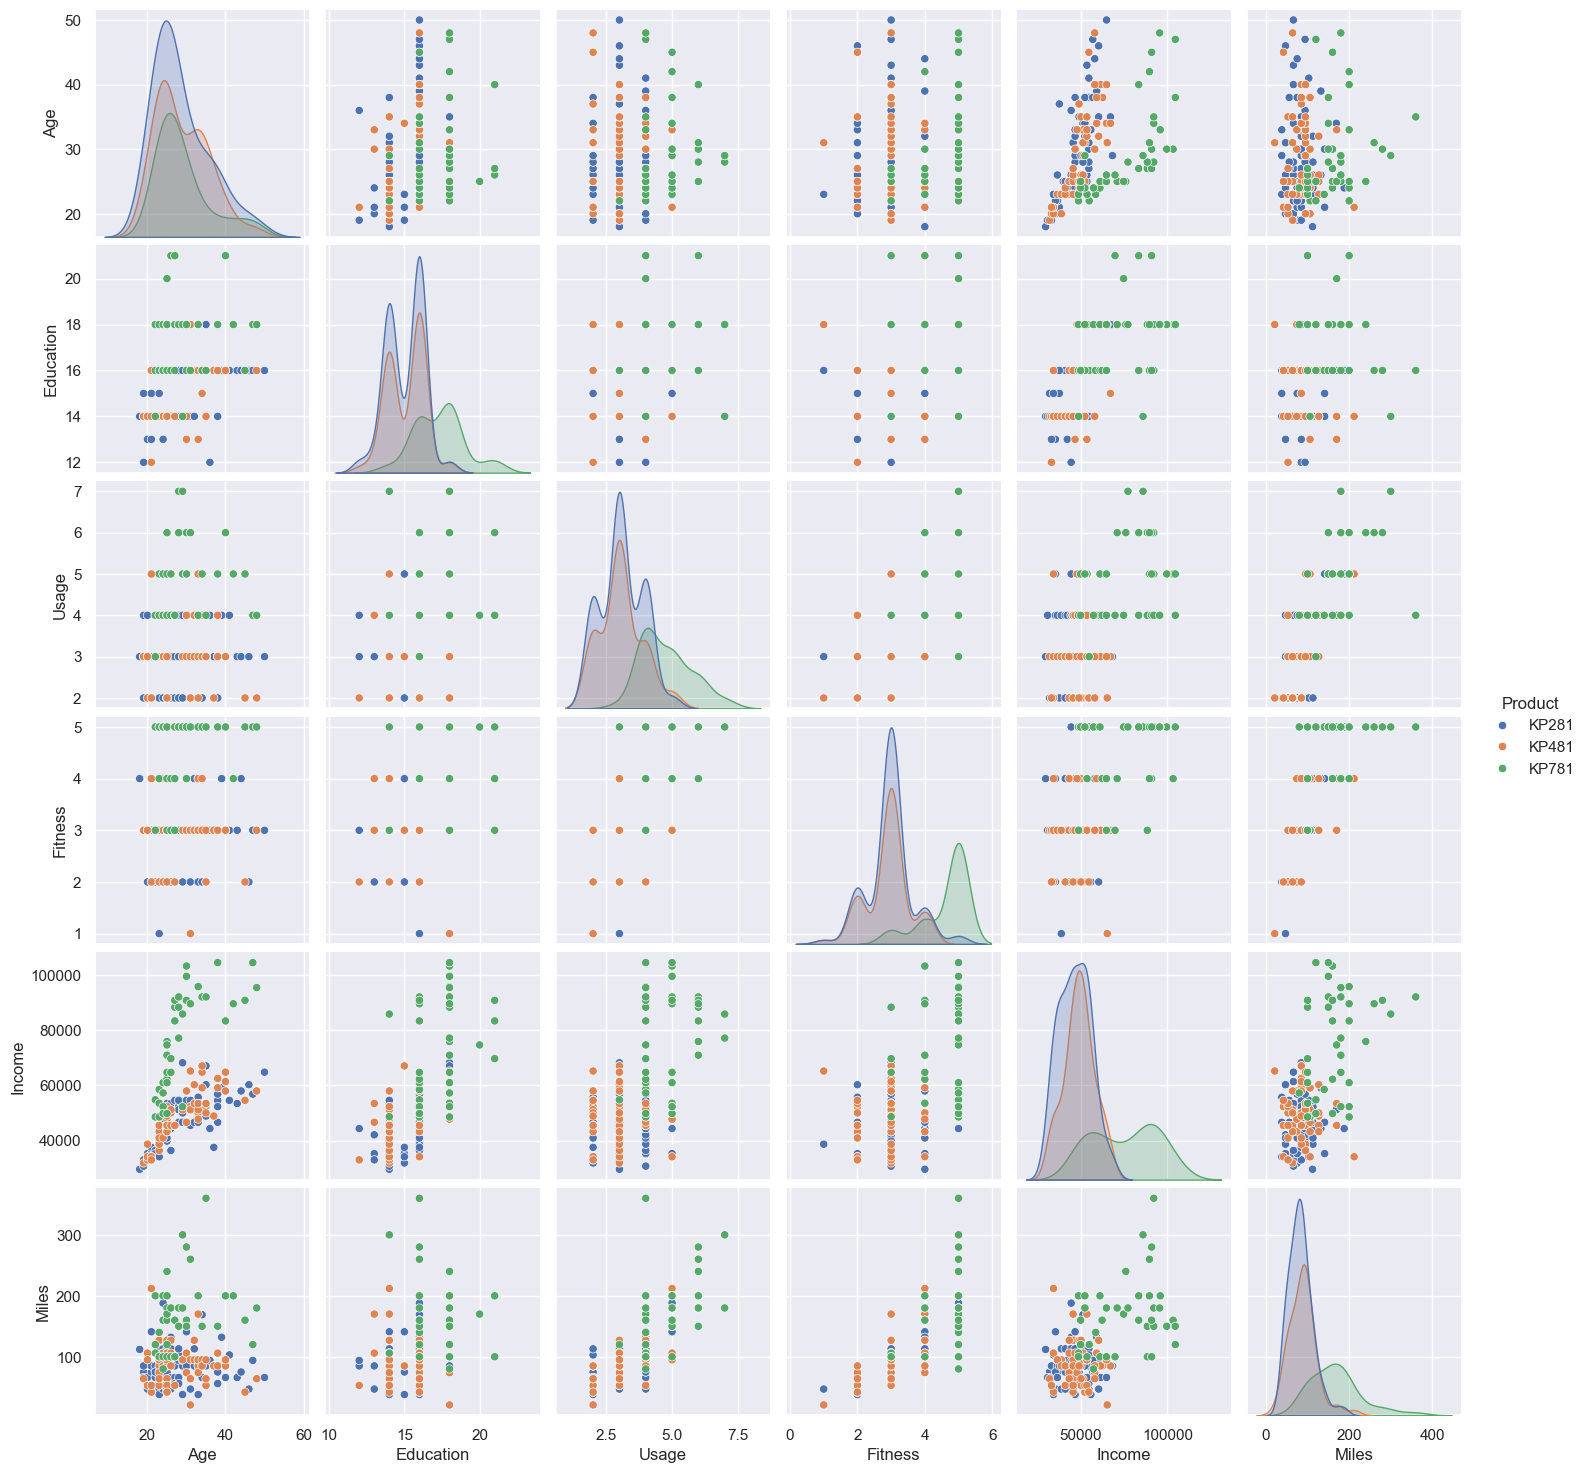

In [47]:
sns.pairplot(df, hue = "Product")
plt.show()

## Marginal & Conditional Probabilities


In [48]:
#1 What percent of customers have purchased KP281, KP481, or KP781?


In [49]:
(
    (df
   .groupby('Product')['Product']
   .value_counts()/len(df))
   .mul(100)
   .round(3)
   .to_frame(name='Percentage')
)

,Percentage
Product,
KP281,0.0
KP481,0.0
KP781,0.0


In [50]:
(
    (df
   .groupby(['Product','Gender'])['Product']
   .value_counts()/len(df))
   .mul(100)
   .round(3)
   .to_frame(name='Percentage')
)

Percentage
Product Gender            
KP281   Female      22.222
        Male        22.222
KP481   Female      16.111
        Male        17.222
KP781   Female       3.889
        Male        18.333

In [51]:
(
    (df
   .groupby(['Product','MaritalStatus'])['Product']
   .value_counts()/len(df))
   .mul(100)
   .round(3)
   .to_frame(name='Percentage')
)

Percentage
Product MaritalStatus            
KP281   Partnered          26.667
        Single             17.778
KP481   Partnered          20.000
        Single             13.333
KP781   Partnered          12.778
        Single              9.444

In [52]:
## condtional probability

In [53]:
What is the probability of a customer based on Gender ( Male or Female ) buying a certain treadmill Product?


Object `Product` not found.


In [54]:
(df['Gender']
    .value_counts(normalize=True)
    .round(2)
)

Gender
Male      0.58
Female    0.42
Name: proportion, dtype: float64

In [55]:
cont_gender =pd.crosstab(index = df["Product"], columns = df["Gender"] , margins = True, normalize= "columns").round(2)
cont_gender

Gender,Female,Male,All
Product,,,
KP281,0.53,0.38,0.44
KP481,0.38,0.30,0.33
KP781,0.09,0.32,0.22


In [56]:
(df['MaritalStatus']
    .value_counts(normalize=True)
    .round(2)*100
)

MaritalStatus
Partnered    59.0
Single       41.0
Name: proportion, dtype: float64

In [57]:
cont_marital =pd.crosstab(index = df["Product"], columns = df["MaritalStatus"] , margins = True, normalize= "columns").round(2)
cont_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.45,0.44,0.44
KP481,0.34,0.33,0.33
KP781,0.21,0.23,0.22


In [58]:
bins = [-1.0 , 60000.0, 90000.0, 200000.0]
labels = ["lower", "middle", "upper"]


df["Income_category"] = pd.cut(df["Income"], bins = bins, labels = labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,lower
1,KP281,19,Male,15,Single,2,3,31836,75,lower
2,KP281,19,Female,14,Partnered,4,3,30699,66,lower
3,KP281,19,Male,12,Single,3,3,32973,85,lower
4,KP281,20,Male,13,Partnered,4,2,35247,47,lower


In [59]:
con_income = pd.crosstab(index = df["Income_category"], columns = df["Product"] , margins = True,normalize='columns').round(2)
con_income

Product,KP281,KP481,KP781,All
Income_category,,,,
lower,0.92,0.88,0.28,0.77
middle,0.08,0.12,0.42,0.17
upper,0.00,0.00,0.30,0.07


## Product - Gender


In [60]:
# Probability of a customer being a Female given that Product is KP281
# P(A|B) = P(A,B)/P(B) - Bayes' Theorem
# P(Female|KP281) = P(Female,KP281)/P(KP281)

In [61]:
product_gender = pd.crosstab(index = df["Product"], columns = df["Gender"] , margins = True,normalize='index')
product_gender

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


## Product - Age


In [62]:
# Create a copy for age analysis
age_df = df.copy()

In [63]:
# Extracting 2 new features from Age:
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20, 20-30, 30-40 & 40-60

age_bins = [14, 20, 30, 40, 60]
age_labels = ["Teens", "20s", "30s", "Above 40s"]
age_df['AgeGroup'] = pd.cut(age_df['Age'], age_bins)
age_df['AgeCategory'] = pd.cut(age_df['Age'], age_bins, labels=age_labels)

In [64]:
age_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,lower,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,lower,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,lower,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,lower,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,lower,"(14, 20]",Teens


In [65]:
# Crosstab of Product by Age Category
product_by_age = pd.crosstab(index=age_df['Product'], 
                               columns=[age_df['AgeCategory']], 
                               margins=True,normalize='index')
product_by_age

AgeCategory,Teens,20s,30s,Above 40s
Product,,,,
KP281,0.075000,0.612500,0.237500,0.075000
KP481,0.066667,0.516667,0.383333,0.033333
KP781,0.000000,0.750000,0.150000,0.100000
All,0.055556,0.611111,0.266667,0.066667


In [66]:
# Probability of a customer being a Teen given that Product is KP281
# P(A|B) = P(A,B)/P(B) - Bayes' Theorem
# P(Teen|KP281) = P(Teen,KP281)/P(KP281)

## Product - Income


In [67]:
# Create a copy for income analysis
income_df = df.copy()

In [68]:
# Extracting 1 new categorical feature based on the Income:
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

income_bins = [29000, 35000, 60000, 85000, 105000]
income_labels = ['Low Income', 'Lower-middle Income', 'Upper-Middle Income', 'High Income']
income_df['IncomeCategory'] = pd.cut(income_df['Income'], income_bins, labels=income_labels)

In [69]:
income_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,lower,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,lower,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,lower,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,lower,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,lower,Lower-middle Income


In [70]:
# Crosstab of Product by Income Category
product_by_income = pd.crosstab(index=income_df['Product'], 
                                 columns=[income_df['IncomeCategory']], 
                                 margins=True,normalize='index').round(2)
product_by_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income
Product,,,,
KP281,0.10,0.82,0.08,0.00
KP481,0.10,0.78,0.12,0.00
KP781,0.00,0.28,0.30,0.42
All,0.08,0.69,0.14,0.09


In [71]:
# Percentage of a low-income customer purchasing a treadmill = 8%
# Percentage of a high-income customer purchasing a treadmill =9%
# Percentage of customer with low-income salary buying treadmill given that Product is KP781)[P(low1/KP781)] = 0.00%
# Percentage of customer with high-income salary buying treadmill given that Product is KP781)[P(high income/KP781)] = 42%

## Product - Fitness

In [72]:
# Crosstab of Product by Fitness Level
product_by_fitness = pd.crosstab(index=df['Product'], 
                                  columns=[df['Fitness']], 
                                  margins=True,normalize='index').round(2)
product_by_fitness

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.18,0.68,0.11,0.02
KP481,0.02,0.20,0.65,0.13,0.00
KP781,0.00,0.00,0.10,0.18,0.72
All,0.01,0.14,0.54,0.13,0.17


In [73]:
.01/100

0.0001

In [74]:
# Percentage of customers having fitness level 5 = 17%
# Percentage of customer with fitness level 1 buying KP281 treadmill given that Product is KP781 =0.0001%
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781 =72%



## Product - Marital Status


In [75]:
# Crosstab of Product by Marital Status
product_by_marital = pd.crosstab(index=df['Product'], 
                                  columns=[df['MaritalStatus']], 
                                  margins=True,normalize='index')
product_by_marital

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [76]:
# Percentage of customers who are partnered using treadmills = 59%
# Percentage of customer who is single buying KP281 treadmill given that Product is KP781 =40%
# Percentage of customer who is partnered buying KP781 treadmill given that Product is KP781 =57%


In [77]:

##

## Outlier Detection


In [78]:
df.select_dtypes(include=['number']).describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [79]:
df.select_dtypes(include=['number']).describe().loc[['min','25%','75%','max']]

,Age,Education,Usage,Fitness,Income,Miles
min,18.0,12.0,2.0,1.0,29562.00,21.00
25%,24.0,14.0,3.0,3.0,44058.75,66.00
75%,33.0,16.0,4.0,4.0,58668.00,114.75
max,50.0,21.0,7.0,5.0,104581.00,360.00


In [80]:
df.select_dtypes(include=['number']).describe().loc[['min','25%']].pct_change().round(2)

,Age,Education,Usage,Fitness,Income,Miles
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.33,0.17,0.5,2.0,0.49,2.14


In [81]:
df.select_dtypes(include=['number']).describe().loc[['75%','max']].pct_change().round(2)

,Age,Education,Usage,Fitness,Income,Miles
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,0.52,0.31,0.75,0.25,0.78,2.14


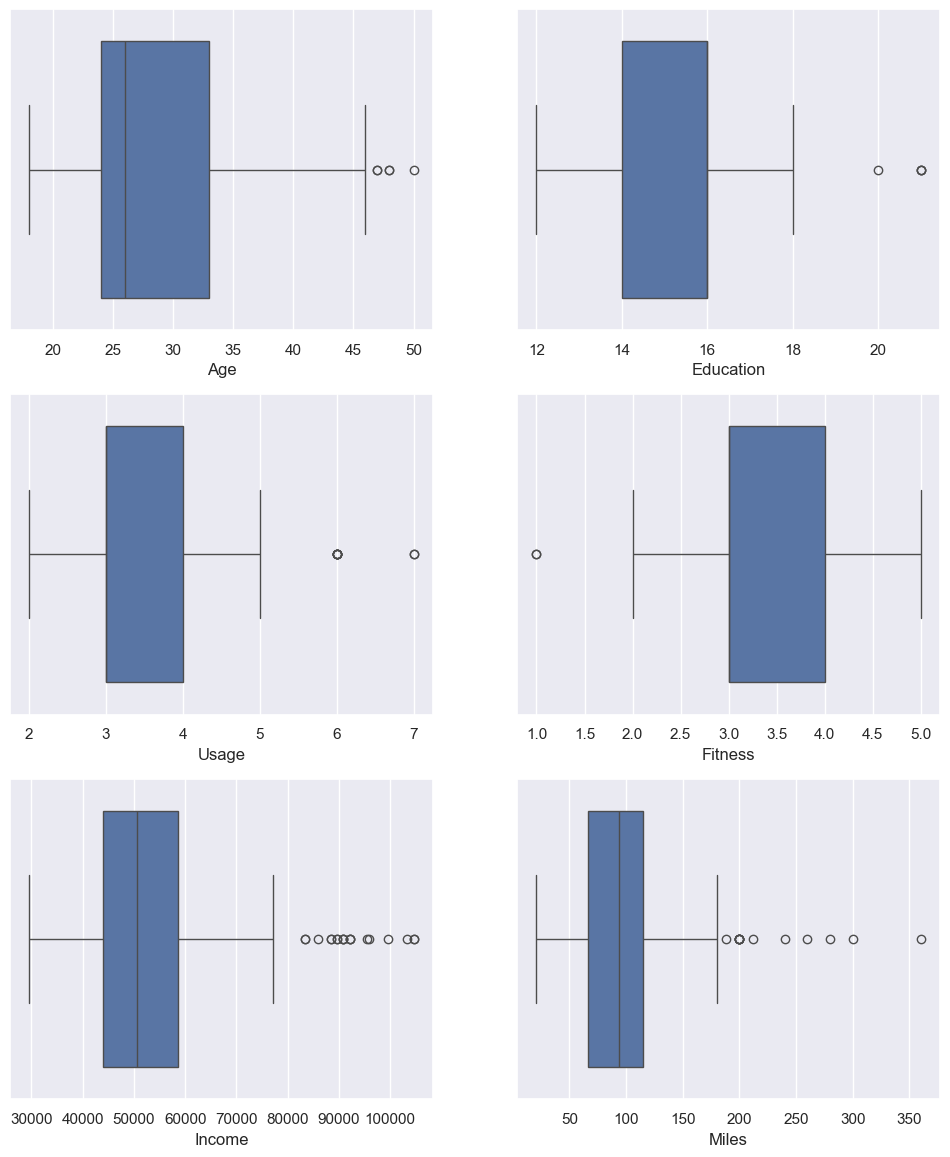

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axes[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axes[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axes[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axes[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axes[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axes[2,1])
plt.show()

## Outlier Handling for Income Feature


In [83]:
# Create a copy for outlier treatment
outlier_df = df.copy()

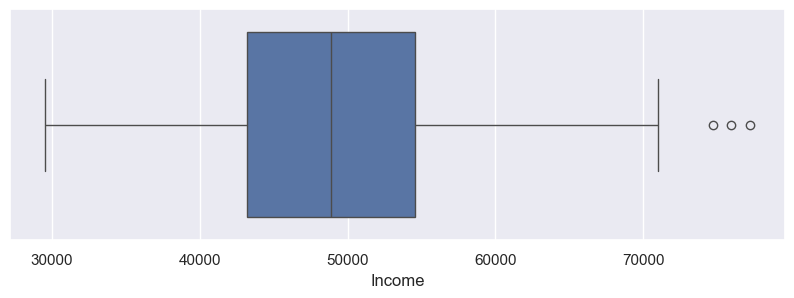

In [84]:
# Outlier Treatment for Income: Removing outliers using IQR method
income_q3 = outlier_df['Income'].quantile(0.75)
income_q1 = outlier_df['Income'].quantile(0.25)
income_iqr = income_q3 - income_q1
aerofit_income_cleaned = outlier_df[(outlier_df['Income'] > income_q1 - 1.5*income_iqr) & 
                                             (outlier_df['Income'] < income_q3 + 1.5*income_iqr)]

fig, axes = plt.subplots(figsize=(10, 3))
sns.boxplot(data=aerofit_income_cleaned, x="Income", orient='h', ax=axes)
plt.show()

## Outlier Handling for Miles Feature


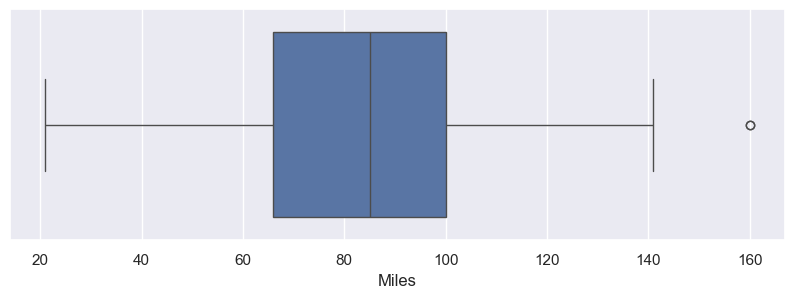

In [85]:
# Outlier Treatment for Miles: Removing outliers using IQR method
miles_q3 = aerofit_income_cleaned['Miles'].quantile(0.75)
miles_q1 = aerofit_income_cleaned['Miles'].quantile(0.25)
miles_iqr = miles_q3 - miles_q1
aerofit_miles_cleaned = aerofit_income_cleaned[(aerofit_income_cleaned['Miles'] > miles_q1 - 1.5*miles_iqr) & 
                                         (aerofit_income_cleaned['Miles'] < miles_q3 + 1.5*miles_iqr)]

fig, axes = plt.subplots(figsize=(10, 3))
sns.boxplot(data=aerofit_miles_cleaned, x="Miles", orient='h', ax=axes)
plt.show()

In [86]:
# Before removal of Outliers
df.shape

(180, 10)

In [87]:
# After removal of Outliers
aerofit_miles_cleaned.shape

(147, 10)

## Customer Profiling

In [88]:
## Example profile : Married and Women and >10 years of education and fitness = 5 

In [89]:
c1 = df['MaritalStatus'] == "Partnered"

c2 = df['Gender'] == "Female"

c3 = df['Education'] > 10

c4 = df['Fitness'] == 5

In [90]:
df[c1 & c2 & c3 & c4]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
23,KP281,24,Female,16,Partnered,5,5,44343,188,lower
152,KP781,25,Female,18,Partnered,5,5,61006,200,middle
162,KP781,28,Female,18,Partnered,6,5,92131,180,upper
167,KP781,30,Female,16,Partnered,6,5,90886,280,upper
171,KP781,33,Female,18,Partnered,4,5,95866,200,upper


In [91]:
df[c1 & c2 & c3 & c4]["Product"].value_counts(normalize = True)

Product
KP781    0.8
KP281    0.2
KP481    0.0
Name: proportion, dtype: float64

In [92]:
c1 = df['MaritalStatus'] == "Partnered"

c2 = df['Gender'] == "Female"

df[c1 & c2]["Product"].value_counts(normalize = True)

Product
KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: proportion, dtype: float64